<a href="https://colab.research.google.com/github/NicoMontoya/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary: "How lucky of you to be left handed!". A constant message to me while growing up playing tennis. Was I lucky? Didn't really feel like it when I was playing. Winning a tennis match was always hard for me. If it is such an advantage, lefties should be dominating the top of the game, right? This is my attempt to find out.

first: 
- analyze top 100.  Breakdown of lefties vs righties in the latest ranking available.
- determine if difference from general population is statistically significant.
- compare to years past

second:
- analyze matches within each year of top 100 vs top 100 players.
- determine if lefties win more or less

Third/ bonus:
- analyze matches based on surface.
- determine if lefties have any advantage on a particular surface

Fourth
- do the exact same analysis for women

In [0]:
## perform classic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats

pd.set_option('display.max_columns', None)

## Wrangle ATP data to get top 100 players and matches they played against each other

In [0]:
## import player data
players_columns = ['player_id', 'first_name', 'last_name', 'hand', 'birth_date', 'country_code']
players = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_players.csv', names=players_columns, encoding = 'ISO-8859-1')

In [0]:
## import ranking data for 2018
rankings_columns = ['ranking_date', 'ranking', 'player_id', 'ranking_points']
current_ranking = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_current.csv', names=rankings_columns)

In [0]:
## merge players data with current rankings data
current_ranking = pd.merge(players, current_ranking, on='player_id')

In [0]:
current_ranking['ranking_date'] = pd.to_datetime(current_ranking['ranking_date'], format='%Y%m%d')

In [0]:
year_end_ranking2018 = current_ranking[current_ranking['ranking_date'] == '2018-09-24'].sort_values(by='ranking')

In [0]:
year_end_ranking2018 = year_end_ranking2018.head(100)

In [0]:
year_end_ranking2018 = year_end_ranking2018.replace({'R':0, 'L':1, 'U':0})

In [9]:
# import ranking data for 2010's
ranking2010s = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_10s.csv', names=rankings_columns)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ranking2010s['ranking_date'] = pd.to_datetime(ranking2010s['ranking_date'], format='%Y%m%d')

In [0]:
## merge ranking2010s with players data
ranking2010s = pd.merge(players, ranking2010s, on='player_id')
ranking2010s = ranking2010s.replace({'R':0, 'L':1})

In [0]:
year_end_ranking2017 = ranking2010s[ranking2010s['ranking_date'] == '2017-12-25'].sort_values(by='ranking')

In [0]:
year_end_ranking2017 = year_end_ranking2017.head(100)

In [0]:
year_end_ranking2016 = ranking2010s[ranking2010s['ranking_date'] == '2016-12-26'].sort_values(by='ranking')

In [0]:
year_end_ranking2016 = year_end_ranking2016.head(100)

In [0]:
year_end_ranking2015 = ranking2010s[ranking2010s['ranking_date'] == '2015-12-28'].sort_values(by='ranking')

In [0]:
year_end_ranking2015 = year_end_ranking2015.head(100)

In [0]:
year_end_ranking2014 = ranking2010s[ranking2010s['ranking_date'] == '2014-12-29'].sort_values(by='ranking')
year_end_ranking2014 = year_end_ranking2014.head(100)

In [0]:
year_end_ranking2013 = ranking2010s[ranking2010s['ranking_date'] == '2013-12-30'].sort_values(by='ranking')
year_end_ranking2013 = year_end_ranking2013.head(100)

In [0]:
year_end_ranking2012 = ranking2010s[ranking2010s['ranking_date'] == '2012-12-31'].sort_values(by='ranking')
year_end_ranking2012 = year_end_ranking2012.head(100)

In [0]:
year_end_ranking2011 = ranking2010s[ranking2010s['ranking_date'] == '2011-12-26'].sort_values(by='ranking')
year_end_ranking2011 = year_end_ranking2011.head(100)

In [0]:
year_end_ranking2010 = ranking2010s[ranking2010s['ranking_date'] == '2010-12-27'].sort_values(by='ranking')
year_end_ranking2010 = year_end_ranking2010.head(100)

Let's analyze the top 100 rankings for the last 9 years for men

In [0]:
## ATP dataframe contains top 100 men and their data
## for the corresponding year
atpyear_end_rankings = [year_end_ranking2010, year_end_ranking2011, year_end_ranking2012,
                       year_end_ranking2013, year_end_ranking2014, year_end_ranking2015,
                       year_end_ranking2016, year_end_ranking2017, year_end_ranking2018]
atpdf = pd.concat(atpyear_end_rankings)

In [0]:
## ATP crosstab gives a break down of lefties and righties in the top 100 
## for the given year
ATPct = pd.crosstab(atpdf['ranking_date'].dt.year, atpdf['hand'], normalize=True)


## Wrangle womens data to get top 100 and the matches they played against each other

In [0]:
#import women players info
wtaplayers = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_players.csv', names=players_columns, encoding='ISO-8859-1')


In [0]:
#import recent rankings
wtarankings_columns = ['ranking_date', 'ranking', 'player_id', 'ranking_points', 'tours']
wtacurrent_ranking = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_rankings_current.csv', names=wtarankings_columns)

In [0]:
wtacurrent_ranking['ranking_date'] = pd.to_datetime(wtacurrent_ranking['ranking_date'], format='%Y%m%d')

In [0]:
wtacurrent_ranking = pd.merge(wtaplayers, wtacurrent_ranking, on='player_id')
wtacurrent_ranking = wtacurrent_ranking.replace({'R':0, 'U':0, 'L':1})

In [0]:
wtayear_end_ranking2018 = wtacurrent_ranking[wtacurrent_ranking['ranking_date'] == '2018-12-24'].sort_values(by='ranking').head(100)

In [0]:
# import rankings for 2010s womens
wtaranking2010s = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_rankings_10s.csv', names = wtarankings_columns)

In [0]:
wtaranking2010s = pd.merge(wtaplayers, wtaranking2010s, on='player_id')

In [0]:
wtaranking2010s['ranking_date'] = pd.to_datetime(wtaranking2010s['ranking_date'], format='%Y%m%d')

In [0]:
wtaranking2010s = wtaranking2010s.replace({'R':0, 'L':1, 'U':0})

In [0]:
wtayear_end_ranking2017 = wtaranking2010s[wtaranking2010s['ranking_date']=='2017-11-20'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2016 = wtaranking2010s[wtaranking2010s['ranking_date']=='2016-12-26'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2015 = wtaranking2010s[wtaranking2010s['ranking_date']=='2015-12-28'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2014 = wtaranking2010s[wtaranking2010s['ranking_date']=='2014-12-29'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2013 = wtaranking2010s[wtaranking2010s['ranking_date']=='2013-12-30'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2012 = wtaranking2010s[wtaranking2010s['ranking_date']=='2012-12-31'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2011 = wtaranking2010s[wtaranking2010s['ranking_date']=='2011-12-26'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2010 = wtaranking2010s[wtaranking2010s['ranking_date']=='2010-12-27'].sort_values(by='ranking').head(100)

In [0]:
## WTA dataframe contains data of top 100 women and their info
wtayear_end_rankings = [wtayear_end_ranking2010,wtayear_end_ranking2011, wtayear_end_ranking2012,
                    wtayear_end_ranking2013, wtayear_end_ranking2014, wtayear_end_ranking2015, wtayear_end_ranking2016,
                    wtayear_end_ranking2017, wtayear_end_ranking2018]
wtadf = pd.concat(wtayear_end_rankings)

In [0]:
## crosstab shows the breakdown of righties and lefties in the top 100 for each year

WTAct = pd.crosstab(wtadf['ranking_date'].dt.year, wtadf['hand'], normalize='index')


## T-test to see if there is a significant difference between mean lefties of population and number of lefties in the top 100 of the ATP and WTA

In [44]:
stats.ttest_1samp(ATPct[1], .10)

Ttest_1sampResult(statistic=-120.68048528059148, pvalue=2.484637583922655e-14)

In [45]:
stats.ttest_1samp(WTAct[1], .10)

Ttest_1sampResult(statistic=-3.5068322372799012, pvalue=0.007998608765899168)

In [46]:
ATPct.describe()

hand,0,1
count,9.000000,9.000000
mean,0.095062,0.016049
std,0.002087,0.002087
min,0.091111,0.013333
25%,0.093333,0.014444
50%,0.095556,0.015556
75%,0.096667,0.017778
max,0.097778,0.020000


In [0]:
atpdf['hand'] = atpdf['hand'].astype(int)

In [48]:
atpdf.describe()

,player_id,hand,birth_date,ranking
count,900.000000,900.000000,9.000000e+02,900.00000
mean,105385.355556,0.144444,1.986571e+07,50.50000
std,4572.649840,0.351735,4.270342e+04,28.88212
min,100644.000000,0.000000,1.976042e+07,1.00000
25%,104269.000000,0.000000,1.983112e+07,25.75000
50%,104792.000000,0.000000,1.986090e+07,50.50000
75%,105380.500000,0.000000,1.989072e+07,75.25000
max,200282.000000,1.000000,1.999042e+07,100.00000


In [49]:
## reject null hypothesis and say that men lefties show up more in the game of tennis
## compared to world population

stats.ttest_1samp(atpdf['hand'], .10)

Ttest_1sampResult(statistic=3.790729530002155, pvalue=0.000160224068609131)

In [50]:
WTAct.describe()

hand,0.0,1.0
count,9.000000,9.000000
mean,0.918889,0.081111
std,0.016159,0.016159
min,0.900000,0.060000
25%,0.900000,0.070000
50%,0.920000,0.080000
75%,0.930000,0.100000
max,0.940000,0.100000


In [51]:
wtadf['hand'] = wtadf['hand'].astype(int)
wtadf.describe()

,player_id,hand,birth_date,ranking,ranking_points,tours
count,900.000000,900.000000,9.000000e+02,900.00000,900.000000,588.000000
mean,202238.350000,0.081111,1.988854e+07,50.50000,1697.753333,22.066327
std,2593.418202,0.273157,4.540391e+04,28.88212,1529.814735,4.961249
min,200002.000000,0.000000,1.970093e+07,1.00000,581.000000,0.000000
25%,201435.000000,0.000000,1.986033e+07,25.75000,806.750000,20.000000
50%,201517.000000,0.000000,1.989053e+07,50.50000,1109.000000,23.000000
75%,201620.000000,0.000000,1.992032e+07,75.25000,1845.750000,25.000000
max,216153.000000,1.000000,2.001083e+07,100.00000,13260.000000,34.000000


In [52]:
## reject null hypothesis and say women lefties show up less in tennis than mean population
stats.ttest_1samp(wtadf['hand'], .10)

Ttest_1sampResult(statistic=-2.07450546095252, pvalue=0.03831645576759973)

In [53]:
ATP_WTA = pd.concat([atpdf, wtadf])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [54]:
## fail to reject null hypothesis when data is combined for men and women.

stats.ttest_1samp(ATP_WTA['hand'], .10)

Ttest_1sampResult(statistic=1.7133375797959451, pvalue=0.0868227377176928)

## Import data for match statistics

In [0]:
#import 2018 match statistics
atpmatches2018 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv')
atpmatches2017 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv')
atpmatches2016 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv')
atpmatches2015 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv')
atpmatches2014 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv')
atpmatches2013 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2013.csv')
atpmatches2012 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2012.csv')
atpmatches2011 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2011.csv')
atpmatches2010 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2010.csv')

In [0]:
atpmatches2018 = atpmatches2018[atpmatches2018['winner_rank']<=100]
atpmatches2018 = atpmatches2018[atpmatches2018['loser_rank']<=100]
atpmatches2018 = atpmatches2018.replace({'R':0, 'U':0, 'L':1})

In [0]:
atpmatches2017 = atpmatches2017[atpmatches2017['winner_rank']<=100]
atpmatches2017 = atpmatches2017[atpmatches2017['loser_rank']<=100]
atpmatches2017 = atpmatches2017.replace({'R':0, 'L':1})

In [0]:
atpmatches2016 = atpmatches2016[atpmatches2016['winner_rank']<=100]
atpmatches2016 = atpmatches2016[atpmatches2016['loser_rank']<=100]
atpmatches2016 = atpmatches2016.replace({'R':0, 'L':1})

In [0]:
atpmatches2015 = atpmatches2015[atpmatches2015['winner_rank']<=100]
atpmatches2015 = atpmatches2015[atpmatches2015['loser_rank']<=100]
atpmatches2015 = atpmatches2015.replace({'R':0, 'L':1})

In [0]:
atpmatches2014 = atpmatches2014[atpmatches2014['winner_rank']<=100]
atpmatches2014 = atpmatches2014[atpmatches2014['loser_rank']<=100]
atpmatches2014 = atpmatches2014.replace({'R':0, 'L':1})

In [0]:
atpmatches2013 = atpmatches2013[atpmatches2013['winner_rank']<=100]
atpmatches2013 = atpmatches2013[atpmatches2013['loser_rank']<=100]
atpmatches2013 = atpmatches2013.replace({'R':0, 'L':1})

In [0]:
atpmatches2012 = atpmatches2012[atpmatches2012['winner_rank']<=100]
atpmatches2012 = atpmatches2012[atpmatches2012['loser_rank']<=100]
atpmatches2012 = atpmatches2012.replace({'R':0, 'L':1})

In [0]:
atpmatches2011 = atpmatches2011[atpmatches2011['winner_rank']<=100]
atpmatches2011 = atpmatches2011[atpmatches2011['loser_rank']<=100]
atpmatches2011 = atpmatches2011.replace({'R':0, 'L':1})

In [0]:
atpmatches2010 = atpmatches2010[atpmatches2010['winner_rank']<=100]
atpmatches2010 = atpmatches2010[atpmatches2010['loser_rank']<=100]
atpmatches2010 = atpmatches2010.replace({'R':0, 'L':1})

In [0]:
atp_matches = [atpmatches2018, atpmatches2017, atpmatches2016, atpmatches2015, atpmatches2014, atpmatches2013,
              atpmatches2012, atpmatches2011, atpmatches2010]
ATPmatchesdf = pd.concat(atp_matches)

In [0]:
## ATP matches dataframe gives all the matches played between the top 100 players.
ATPmatchesdf = ATPmatchesdf.replace('U', 0)

In [0]:
ATPmatchesdf['tourney_date'] = pd.to_datetime(ATPmatchesdf['tourney_date'], format='%Y%m%d')

In [0]:
## breakdown of percent matches won for righties and lefties of total matches in the year
ATPmatchesct = pd.crosstab(ATPmatchesdf['tourney_date'].dt.year, ATPmatchesdf['winner_hand'], normalize='index')

In [0]:
# import wta 2018 matches
wtamatches2018 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2018.csv')
wtamatches2017 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2017.csv')
wtamatches2016 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2016.csv')
wtamatches2015 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2015.csv')
wtamatches2014 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2014.csv')
wtamatches2013 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2013.csv')
wtamatches2012 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2012.csv', encoding='ISO-8859-1')
wtamatches2011 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2011.csv')
wtamatches2010 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2010.csv')

In [0]:
wtamatches2010 = wtamatches2010[wtamatches2010['winner_rank']<=100]
wtamatches2010 = wtamatches2010[wtamatches2010['loser_rank']<=100]
wtamatches2010 = wtamatches2010.replace({'R':0, 'L':1, 'U':0})

wtamatches2011 = wtamatches2011[wtamatches2011['winner_rank']<=100]
wtamatches2011 = wtamatches2011[wtamatches2011['loser_rank']<=100]
wtamatches2011 = wtamatches2011.replace({'R':0, 'L':1, 'U':0})

wtamatches2012 = wtamatches2012[wtamatches2012['winner_rank']<=100]
wtamatches2012 = wtamatches2012[wtamatches2012['loser_rank']<=100]
wtamatches2012 = wtamatches2012.replace({'R':0, 'L':1, 'U':0})

wtamatches2013 = wtamatches2013[wtamatches2013['winner_rank']<=100]
wtamatches2013 = wtamatches2013[wtamatches2013['loser_rank']<=100]
wtamatches2013 = wtamatches2013.replace({'R':0, 'L':1, 'U':0})

wtamatches2014 = wtamatches2014[wtamatches2014['winner_rank']<=100]
wtamatches2014 = wtamatches2014[wtamatches2014['loser_rank']<=100]
wtamatches2014 = wtamatches2014.replace({'R':0, 'L':1, 'U':0})

wtamatches2015 = wtamatches2015[wtamatches2015['winner_rank']<=100]
wtamatches2015 = wtamatches2015[wtamatches2015['loser_rank']<=100]
wtamatches2015 = wtamatches2015.replace({'R':0, 'L':1, 'U':0})

wtamatches2016 = wtamatches2016[wtamatches2016['winner_rank']<=100]
wtamatches2016 = wtamatches2016[wtamatches2016['loser_rank']<=100]
wtamatches2016 = wtamatches2016.replace({'R':0, 'L':1, 'U':0})

wtamatches2017 = wtamatches2017[wtamatches2017['winner_rank']<=100]
wtamatches2017 = wtamatches2017[wtamatches2017['loser_rank']<=100]
wtamatches2017 = wtamatches2017.replace({'R':0, 'L':1, 'U':0})

wtamatches2018 = wtamatches2018[wtamatches2018['winner_rank']<=100]
wtamatches2018 = wtamatches2018[wtamatches2018['loser_rank']<=100]
wtamatches2018 = wtamatches2018.replace({'R':0, 'L':1, 'U':0})

In [0]:
## WTA matches dataframe shows all matches played between the top 100 girls
wta_matches = [wtamatches2018, wtamatches2017, wtamatches2016, wtamatches2015, 
               wtamatches2014, wtamatches2013, wtamatches2012, wtamatches2011, 
               wtamatches2010]

WTAmatchesdf = pd.concat(wta_matches)
WTAmatchesdf['tourney_date'] = pd.to_datetime(WTAmatchesdf['tourney_date'], format='%Y%m%d')

In [0]:
## WTA matches crosstab gives breakdown of percent matches won between lefties and righties
## based on all matches played for the given year
WTAmatchesct = pd.crosstab(WTAmatchesdf['tourney_date'].dt.year, WTAmatchesdf['winner_hand'], normalize='index')

## visualizations

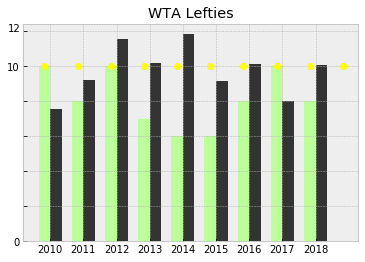

In [73]:
plt.style.use('bmh')
fig, ax = plt.subplots()

ind = np.arange(9)

width = 0.35
p1 = ax.bar(ind, WTAct[1], width, color='#bbff99')
p2 = ax.bar(ind+width, WTAmatchesct[1], width, color='#333333')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('2010', '2011', '2012', '2013', '2014', 
                    '2015', '2016', '2017', '2018'))

ax.set_yticklabels(('0','', '', '', '', '10'))

ind1 = np.arange(.2)


x1 = np.linspace(.1, .1, 10)

ax.plot(x1, 'o', color='yellow')

ax.set_title('WTA Lefties', color='black')

#ax.legend(('Baseline', '# Lefties', '% Matches Won'))

ax.text(x=-1.1, y=.12, s='12', 
        fontsize=10)


plt.show()

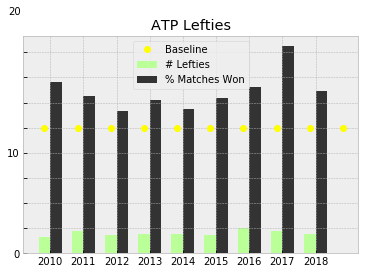

In [74]:
plt.style.use('bmh')
fig, ax = plt.subplots()

ind = np.arange(9)

x = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
y = ATPct[1]

y2 = ATPmatchesct[1]

width = 0.35
p2 = ax.bar(x, y, width, color='#bbff99')
p3 = ax.bar(ind+width, y2, width, color='#333333')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('2010', '2011', '2012', '2013', '2014', 
                    '2015', '2016', '2017', '2018'))

ax.set_yticklabels(('0','', '', '', '10', '','', ''))


ind1 = np.arange(.2)


x1 = np.linspace(.1, .1, 10)

ax.plot(x1, 'o', color='yellow')

ax.set_title('ATP Lefties', color='black')

ax.legend(('Baseline', '# Lefties', '% Matches Won'))

ax.text(x=-1.1, y=.19, s='20', 
        fontsize=10)


plt.show()

In [0]:
ATPmatches_clay = ATPmatchesdf[ATPmatchesdf['surface']=='Clay']

In [0]:
ATP_clay = pd.crosstab(ATPmatches_clay['tourney_date'].dt.year, ATPmatches_clay['winner_hand'], normalize='index')

In [0]:
ATPmatches_hard = ATPmatchesdf[ATPmatchesdf['surface']=='Hard']
ATP_hard = pd.crosstab(ATPmatches_hard['tourney_date'].dt.year, ATPmatches_hard['winner_hand'], normalize='index')

In [0]:
ATPmatches_grass = ATPmatchesdf[ATPmatchesdf['surface']=='Grass']
ATP_grass = pd.crosstab(ATPmatches_grass['tourney_date'].dt.year, ATPmatches_grass['winner_hand'], normalize='index')

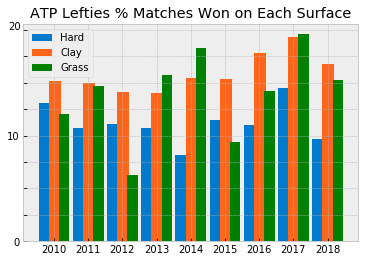

In [79]:
plt.style.use('bmh')
fig, ax = plt.subplots()

ind = np.arange(9)

x = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
y = ATP_hard[1]

y2 = ATP_clay[1]

y3 = ATP_grass[1]


width = 0.30
p2 = ax.bar(x, y,width, color='#007acc',align='edge')
p3 = ax.bar(ind+width, y2,width+.05, color='#ff661a', align='edge')
p4 = ax.bar(ind+.75,y3, width, color='green')


ax.set_xticks(ind + (3*width) / 2)
ax.set_xticklabels(('2010', '2011', '2012', '2013', '2014', 
                    '2015', '2016', '2017', '2018'))

ax.set_yticklabels(('0','', '', '', '10', '','', ''))


ind1 = np.arange(.2)



ax.set_title('ATP Lefties % Matches Won on Each Surface', color='black')

ax.legend(('Hard', 'Clay', 'Grass'))

ax.text(x=-.9, y=.20, s='20', 
        fontsize=10)


plt.show()

In [0]:
WTAmatches_grass = WTAmatchesdf[WTAmatchesdf['surface']=='Grass']
WTA_grass = pd.crosstab(WTAmatches_grass['tourney_date'].dt.year, WTAmatches_grass['winner_hand'], normalize='index')

In [0]:
WTAmatches_clay = WTAmatchesdf[WTAmatchesdf['surface']=='Clay']
WTA_clay = pd.crosstab(WTAmatches_clay['tourney_date'].dt.year, WTAmatches_clay['winner_hand'], normalize='index')

In [0]:
WTAmatches_hard = WTAmatchesdf[WTAmatchesdf['surface']=='Hard']
WTA_hard = pd.crosstab(WTAmatches_hard['tourney_date'].dt.year, WTAmatches_hard['winner_hand'], normalize='index')

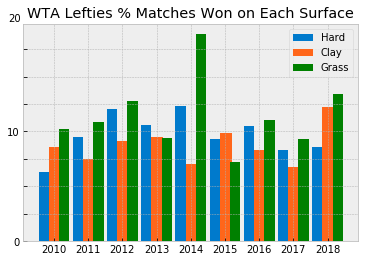

In [83]:
plt.style.use('bmh')
fig, ax = plt.subplots()

ind = np.arange(9)

x = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
y = WTA_hard[1]

y2 = WTA_clay[1]

y3 = WTA_grass[1]


width = 0.30
p2 = ax.bar(x, y,width, color='#007acc',align='edge')
p3 = ax.bar(ind+width, y2,width+.05, color='#ff661a', align='edge')
p4 = ax.bar(ind+.75,y3, width, color='green')


ax.set_xticks(ind + (3*width) / 2)
ax.set_xticklabels(('2010', '2011', '2012', '2013', '2014', 
                    '2015', '2016', '2017', '2018'))

ax.set_yticklabels(('0','', '', '', '10', '','', ''))


ind1 = np.arange(.2)



ax.set_title('WTA Lefties % Matches Won on Each Surface', color='black')

ax.legend(('Hard', 'Clay', 'Grass'))

ax.text(x=-.9, y=.20, s='20', 
        fontsize=10)


plt.show()

##Analyze who is winning most of the matches

In [84]:
ATPmatchesdf[ATPmatchesdf['tourney_date'].dt.year==2017]['winner_name'].value_counts()

Rafael Nadal                   64
Alexander Zverev               47
David Goffin                   47
Roger Federer                  47
Dominic Thiem                  42
Grigor Dimitrov                41
Marin Cilic                    35
Roberto Bautista Agut          35
Jo Wilfried Tsonga             34
Jack Sock                      34
Juan Martin Del Potro          32
Lucas Pouille                  31
Novak Djokovic                 30
Nick Kyrgios                   29
Diego Sebastian Schwartzman    27
John Isner                     27
Tomas Berdych                  26
Fabio Fognini                  25
Stanislas Wawrinka             25
Kevin Anderson                 25
Philipp Kohlschreiber          25
Kei Nishikori                  24
Albert Ramos                   24
Milos Raonic                   24
Pablo Carreno Busta            24
Richard Gasquet                23
Andy Murray                    23
Damir Dzumhur                  23
Adrian Mannarino               23
Alexandr Dolgo

In [85]:
WTAmatchesdf[WTAmatchesdf['tourney_date'].dt.year==2017]['winner_name'].value_counts()

Caroline Wozniacki            50
Karolina Pliskova             49
Elina Svitolina               42
Garbine Muguruza              42
Caroline Garcia               38
Jelena Ostapenko              36
Simona Halep                  36
Julia Goerges                 35
Barbora Zahlavova Strycova    35
Kristina Mladenovic           35
Anastasia Pavlyuchenkova      33
Coco Vandeweghe               32
Venus Williams                32
Darya Kasatkina               31
Johanna Konta                 30
Anastasija Sevastova          29
Shuai Peng                    28
Svetlana Kuznetsova           26
Daria Gavrilova               25
Dominika Cibulkova            24
Angelique Kerber              24
Ekaterina Makarova            23
Lucie Safarova                22
Elise Mertens                 22
Kiki Bertens                  21
Sorana Cirstea                21
Alize Cornet                  20
Elena Vesnina                 20
Agnieszka Radwanska           19
Carla Suarez Navarro          19
          

In [90]:
stats.ttest_ind(ATPmatchesct[1], ATPct[1])

Ttest_indResult(statistic=21.972389117408532, pvalue=2.2337195769437358e-13)

In [88]:
stats.ttest_ind(WTAmatchesct[1], WTAct[1])

Ttest_indResult(statistic=2.267869998257795, pvalue=0.03753870406321239)